In [35]:
import numpy as np
from cycler import cycler

data = []
anomaly_indices = []
count = 0
with open('../HUAWEI.csv', 'r') as f:
    for line in f:
        count += 1
        if count > 250 or count < 150 : continue

        key, p_bits, global_time, label = line.strip().split(',')
        key = int(key)
        global_time = int(global_time)
        label = int(label)
        p_bits = int(p_bits)
        data.append(p_bits)
        if label == 1:
            anomaly_indices.append(len(data)-1)


x = np.arange(len(data)-10)
window_size = 8

means, stds, upper, lower = [], [], [], []
range_x = []
anomalies_x, anomalies_y = [], []

base = 300

for i in range(window_size, len(data)):
    window = data[i - window_size:i]
    # 剔除最大和最小值（仅各剔除一次）
    trimmed = list(window)
    trimmed.remove(np.max(trimmed))
    trimmed.remove(np.min(trimmed))
    trimmed = np.array(trimmed)

    mu = np.mean(trimmed)
    sigma = np.std(trimmed)

    means.append(mu)
    stds.append(sigma)
    upper.append(mu + 3 * sigma + base)
    lower.append(mu - 3 * sigma - base)
    range_x.append(i-10)

    # 检测当前点是否为异常
    if abs(data[i] - mu) > 3 * sigma + base:
        anomalies_x.append(i-10)
        anomalies_y.append(data[i])

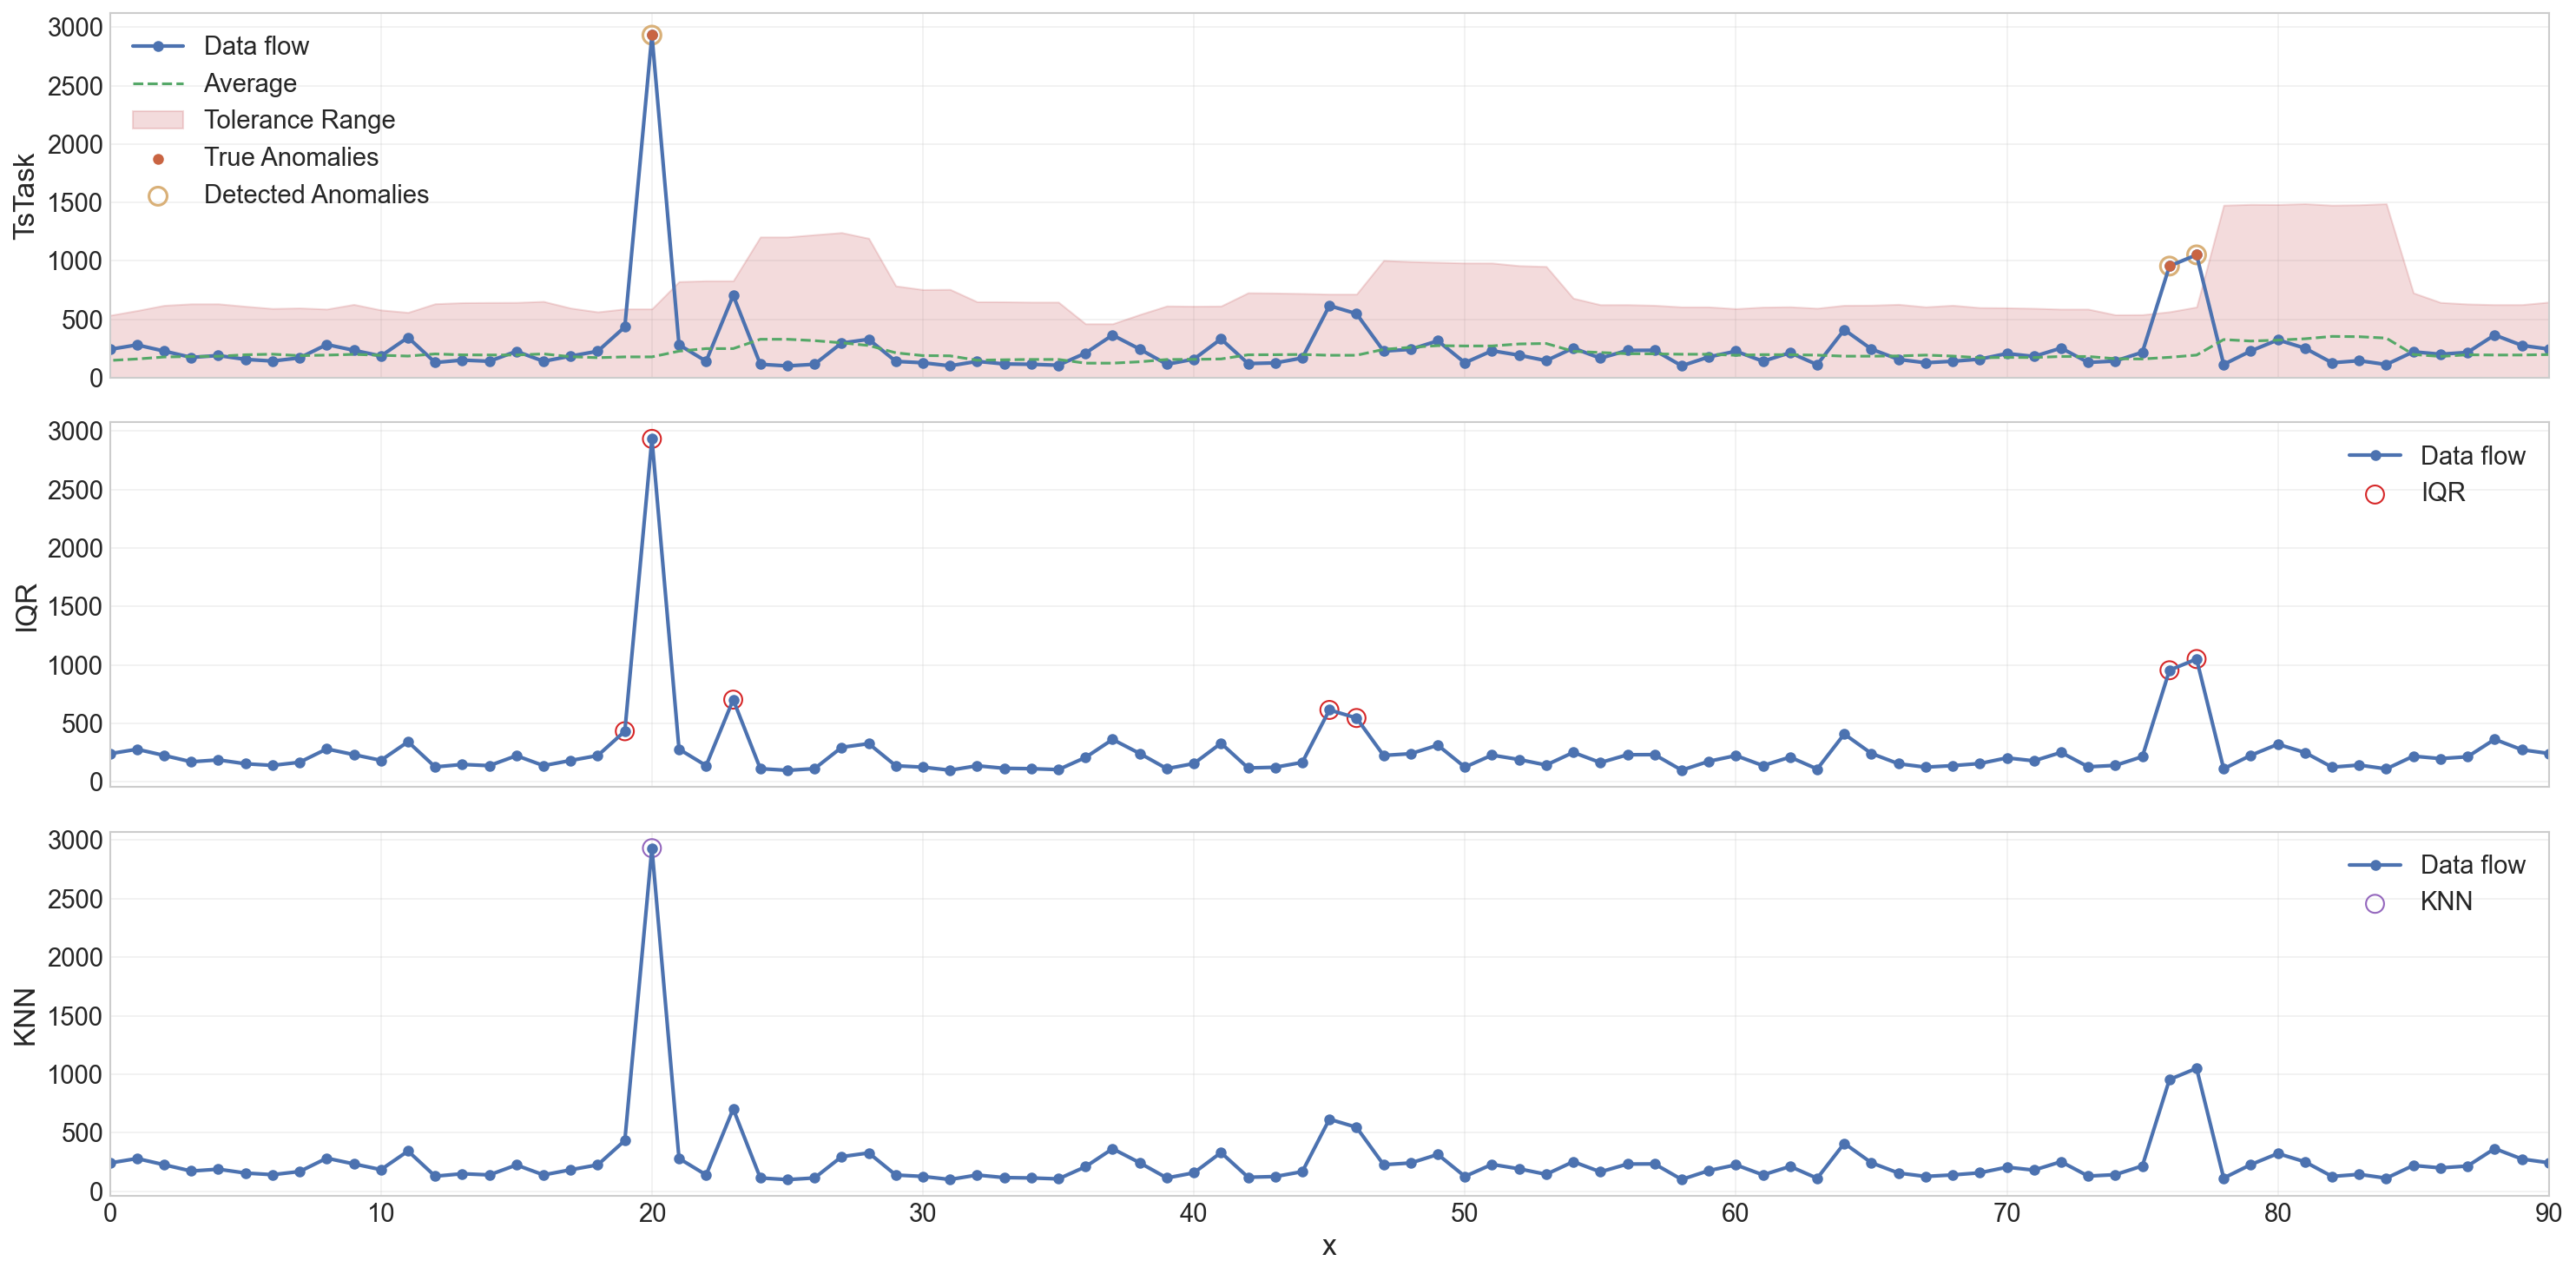

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 设置图表风格为论文品质
plt.style.use('seaborn-v0_8-whitegrid')

# 自定义颜色循环（更适合区分）
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.rcParams['axes.prop_cycle'] = cycler('color', colors)

# 增加默认图表大小和DPI（适合论文）
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300

# 增加线条宽度和标记大小
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

# 增加字体大小
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 生成示例数据
IQR_x = [29, 30, 33, 55, 56, 86, 87]
IQR_y = [data[x] for x in IQR_x]
IQR_x = [IQR_x[x] - 10 for x in range(len(IQR_x))]

# KNN_x = [30]
KNN_y = [data[30]]
KNN_x = [20]

# 方法1：使用 sharex=True 参数
fig, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# 第一个子图
axes[0].plot(x, data[10:], label='Data flow', color='#4C72B0', marker='o', linewidth=2)
axes[0].plot(range_x, means, linestyle='--', color='#55A868', label='Average')
axes[0].fill_between(range_x, lower, upper, color='#C44E52', alpha=0.2, label='Tolerance Range')
axes[0].scatter(anomalies_x, anomalies_y, color='#c96442', label='True Anomalies', zorder=5)
axes[0].scatter(anomalies_x, anomalies_y, edgecolors='#d9b078', label='Detected Anomalies', s=100, facecolors='none',linewidth=1.5)
axes[0].set_ylabel('TsTask')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 90)
axes[0].set_ylim(0)

# 第二个子图
axes[1].plot(x, data[10:], label='Data flow', color='#4C72B0', marker='o', linewidth=2)
axes[1].scatter(IQR_x, IQR_y, edgecolors='#d62728', label='IQR', s=100, facecolors='none',linewidth=1)
axes[1].set_ylabel('IQR')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 第三个子图
axes[2].plot(x, data[10:], label='Data flow', color='#4C72B0', marker='o', linewidth=2)
axes[2].scatter(KNN_x, KNN_y, edgecolors='#9467bd', label='KNN', s=100, facecolors='none',linewidth=1)
axes[2].set_ylabel('KNN')
axes[2].set_xlabel('x')  # 只在最后一个子图设置x轴标签
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 调整子图间距
plt.tight_layout()
plt.savefig('./re.pdf')

plt.show()